### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

In [7]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. Take Home Exercises

---

## 2. New Dataset

### Download Dataset

In [16]:
# Download the dataset
! git clone https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data
! rm -rf Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/.git

fatal: destination path 'Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data' already exists and is not an empty directory.


### Data Preparation and Transformation

In [11]:
import pandas as pd

# Load the dataset as dataframe from the csv file
data_path = 'Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
df = pd.read_csv(data_path)
print(df.info())
df[:10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None


sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...

In [12]:
# familiarize with the dataset
print(f'Number of samples: {len(df)}')
print('-' * 10)
print(f'First two samples: {df[0:2]}')
print('-' * 10)
print(f'First three comments:')
for t in df['comment'][:3]:
    print(t)
print('-' * 10)
print(df[df['sentiment'] == 'nostalgia'][:3])

Number of samples: 1500
----------
First two samples:        sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
----------
First three comments:
He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simpl

### Handle Missing Values and Duplicates

In [13]:
import helpers.data_mining_helpers as dmh

# Check the distribution and missing values
print(f'Distribution of sentiment: {df["sentiment"].value_counts()}')
df.isnull().apply(lambda x: dmh.check_missing_values(x))


Distribution of sentiment: sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [14]:
# Check duplicate records
print(f'Number of duplicate records: {df.duplicated().sum()}')
print(f'Number of duplicate in column "comment":{df.duplicated(subset=["comment"]).sum()}')
print('-' * 10)
print(f'duplicate records: {df[df.duplicated(keep=False)]}')

Number of duplicate records: 1
Number of duplicate in column "comment":1
----------
duplicate records:         sentiment                                            comment
62  not nostalgia  never heard this song before... WOW What an am...
78  not nostalgia  never heard this song before... WOW What an am...


In [15]:
# Drop duplicate records (Keep the first record)
df.drop_duplicates(inplace=True)
print(f'Number of duplicate records after dropping: {df.duplicated().sum()}')
print(f'Length of dataframe after dropping: {len(df)}')

Number of duplicate records after dropping: 0
Length of dataframe after dropping: 1499


### Data Preprocessing

In [16]:
# Data Sampling
X_sample = df.sample(n=1000)
print(f'Length of sampled dataframe: {len(X_sample)}')
print('-' * 10)
print(f'Description of sampled dataframe:')
print(X_sample.describe())
print('-' * 10)
print(f'Description of original dataframe:')
print(df.describe())
print('-' * 10)
print(f'First five samples of sampled dataframe:')
X_sample.head()

Length of sampled dataframe: 1000
----------
Description of sampled dataframe:
        sentiment                                            comment
count        1000                                               1000
unique          2                                               1000
top     nostalgia  I love this song, it is a classic, and there i...
freq          514                                                  1
----------
Description of original dataframe:
        sentiment                                            comment
count        1499                                               1499
unique          2                                               1499
top     nostalgia  This is the first CD I bought after my marriag...
freq          750                                                  1
----------
First five samples of sampled dataframe:


sentiment                                            comment
854       nostalgia  ...evokes old memories & makes you yearn for d...
358   not nostalgia   It's a nice love song that always make me happy.
214       nostalgia  I am always tuning in to Elvis videos on here....
1199  not nostalgia  This is the first time I have really been blow...
1366      nostalgia  Timeless song. One of my favorites . Brings ba...

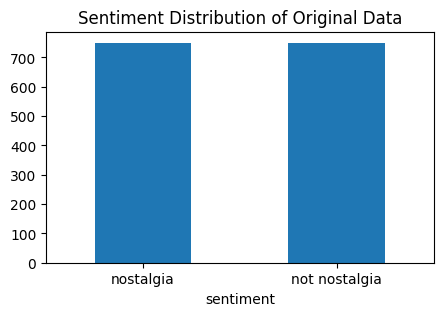

In [17]:
# Category Visualization

import matplotlib.pyplot as plt
%matplotlib inline

df['sentiment'].value_counts().plot(kind='bar', rot=0, figsize=(5, 3))
plt.title('Sentiment Distribution of Original Data')
plt.show()

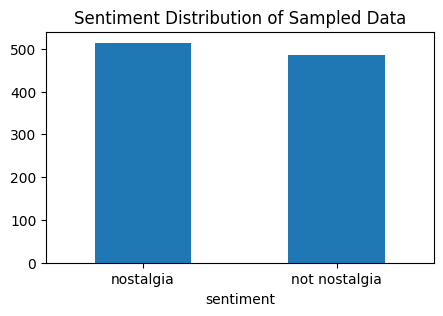

In [18]:
X_sample['sentiment'].value_counts().plot(kind='bar', rot=0, figsize=(5, 3))
plt.title('Sentiment Distribution of Sampled Data')
plt.show()


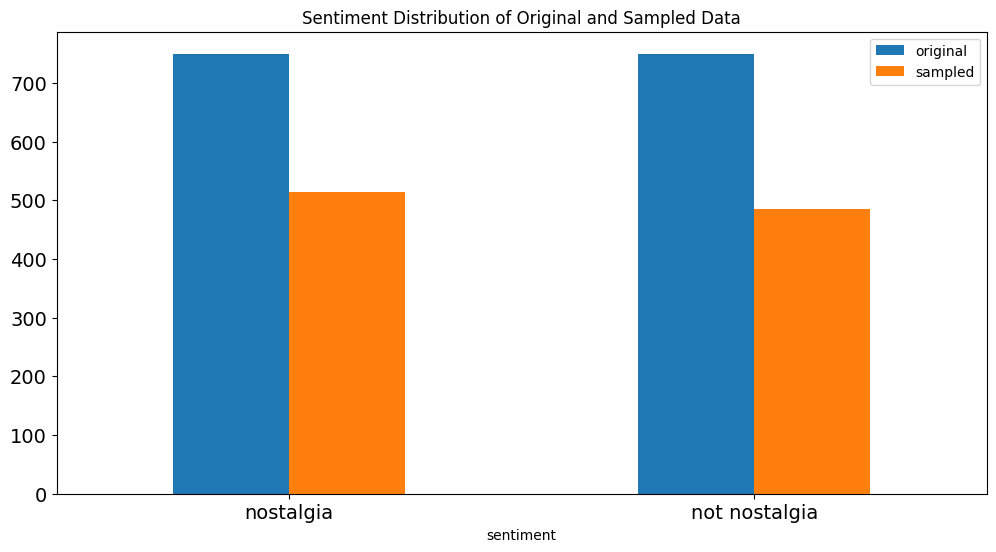

In [19]:
# Combine the two plots
categories = df['sentiment'].unique()
original_counts = df['sentiment'].value_counts()
sampled_counts = X_sample['sentiment'].value_counts()

df_combined = pd.DataFrame({
    'original': original_counts,
    'sampled': sampled_counts
})

ax = df_combined.plot(kind='bar', figsize=(12, 6), width=0.5, fontsize=14)
plt.title('Sentiment Distribution of Original and Sampled Data')
plt.xticks(rotation=360)
plt.show()

### Feature Creation


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/shen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [22]:
df[:10]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
5    [Every, time, I, heard, this, song, as, a, chi...
6    [My, dad, loved, listening, to, Jim, Reeves, ,...
7    [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...
8     [Wherever, you, are, you, always, in, my, heart]
9    [Elvis, will, always, be, number, one, no, one...
Name: unigrams, dtype: object

In [23]:
df[:10]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   
9  not nostalgia  Elvis will always be number one no one can com...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4  [listening, to, his, songs, reminds, me, of, m...  
5  [Every, time, I, heard, this, song, as, a, chi...  
6  [My, dad, loved, listening, to, Jim, Reeves, ,...  
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...  
8   [Wherever, you, are, you, always, in, my, heart]  
9  [Elvis, will, always, be, number, one, no, one...

In [24]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### Feature subset selection

In [25]:
# Use CountVectorizer to transform the text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['comment'])
print(X_counts.shape)
print(X_counts[0])

(1499, 3730)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [26]:
# Compare the sparse matrix and the normal array
print(f'Sparse matrix: {X_counts[0:5, 0:100]}')
print(f'Normal array: {X_counts[0:5, 0:100].toarray()}')

Sparse matrix: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (5, 100)>
  Coords	Values
  (0, 15)	1
  (2, 16)	1
  (3, 91)	1
  (3, 62)	1
  (3, 90)	1
Normal array: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 

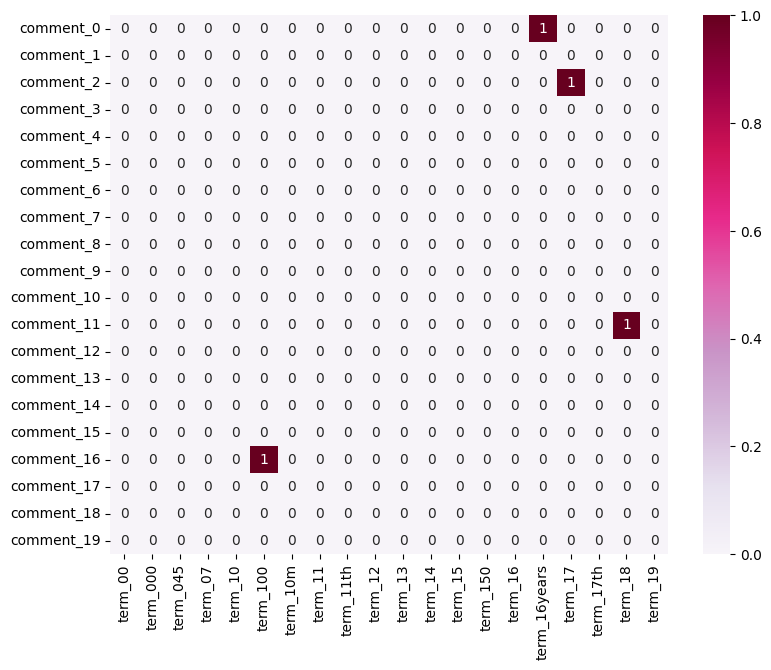

In [27]:
# Draw hot map of the sparse matrix of first 20 features and 20 comments
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["comment_"+str(i) for i in range(X_counts.shape[0])][0:20]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

### Attribute Transformation / Aggregation

/tmp/ipykernel_2467571/2569066884.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


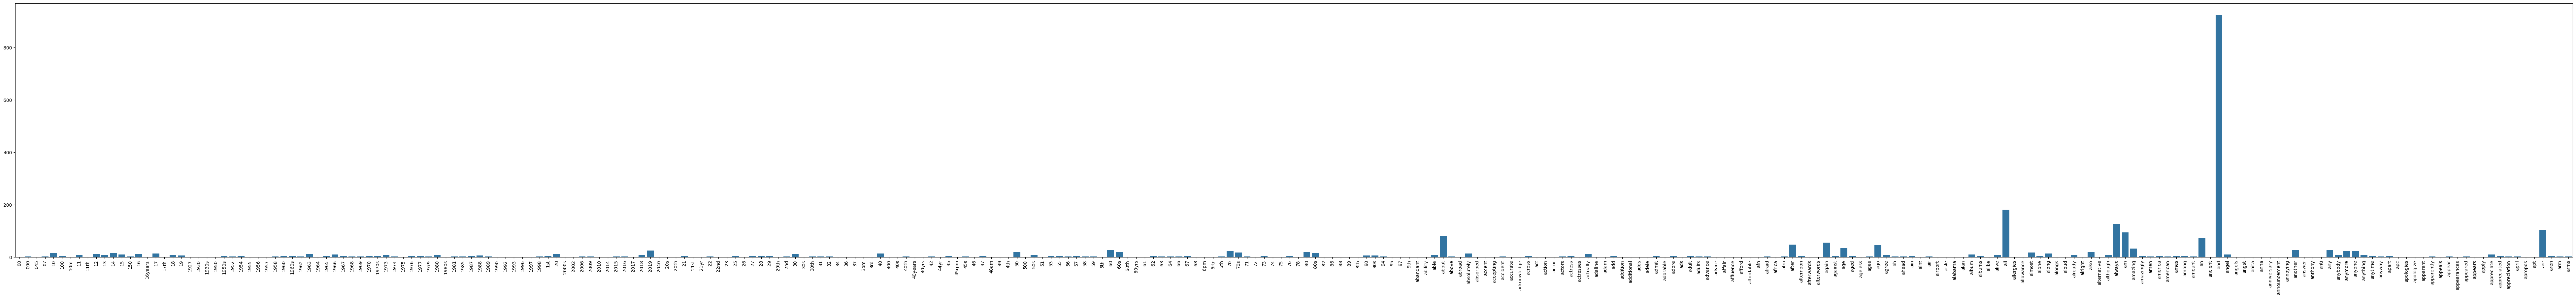

In [28]:
# generate term frequency plot
import seaborn as sns
import numpy as np

term_freq = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_freq[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [29]:
# Use plotly to generate interactive plot
import plotly.graph_objects as go
words = count_vect.get_feature_names_out()[:300]
freqs = term_freq[:300]

fig = go.Figure(data=[go.Bar(x=words, y=freqs)])
fig.show()

In [30]:
# Filter out low frequency words
threshold = 20
mask = freqs >= threshold
filtered_words = np.array(words)[mask]
filtered_freqs = freqs[mask]

fig = go.Figure(data=[go.Bar(x=filtered_words, y=filtered_freqs)])
fig.show()

In [31]:
# Sort the words by frequency
sorted_indices = np.argsort(freqs)[::-1]
sorted_words = count_vect.get_feature_names_out()[sorted_indices]
sorted_freqs = freqs[sorted_indices]

fig = go.Figure(data=[go.Bar(x=sorted_words, y=sorted_freqs)])
fig.show()

/tmp/ipykernel_2467571/3026792016.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



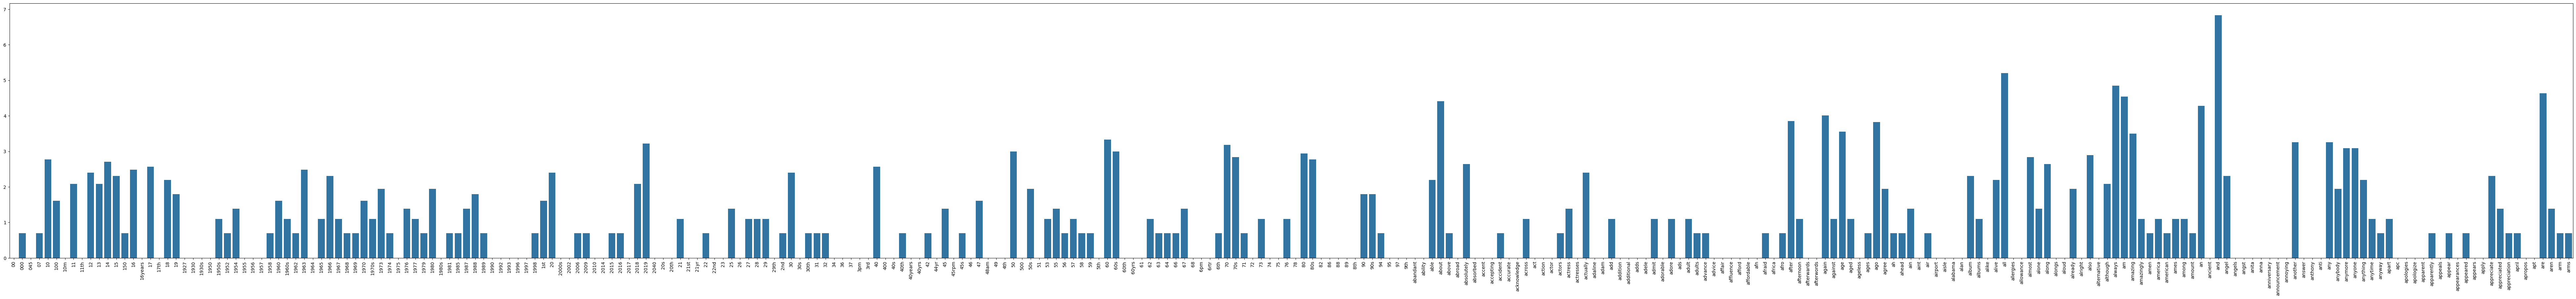

In [32]:
# Log ditribution of the word frequencies
import math
term_freq_log = [math.log(freq) for freq in term_freq]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_freq_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [33]:
# Sorted log ditribution of the word frequencies
term_freq_log = np.array(term_freq_log)
sorted_indices = np.argsort(term_freq_log)[::-1]
sorted_words = count_vect.get_feature_names_out()[sorted_indices]
sorted_freqs = term_freq_log[sorted_indices]

fig = go.Figure(data=[go.Bar(x=sorted_words, y=sorted_freqs)])
fig.show()

### Finding frequent patterns

In [34]:
# Create term-document(comment) frequency matrix

words = count_vect.get_feature_names_out()
term_doc_df = pd.DataFrame(X_counts.toarray(), columns=words)
term_doc_df

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
0      0    0    0   0   0    0    0   0     0   0  ...      0         0   
1      0    0    0   0   0    0    0   0     0   0  ...      0         0   
2      0    0    0   0   0    0    0   0     0   0  ...      0         0   
3      0    0    0   0   0    0    0   0     0   0  ...      0         0   
4      0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1494   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1495   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0         0        0    0    0    0        0      0  
1         0         0        0    0    0    0        0      0  
2         0         0        0    0    0    0        0      0  
3         0         0        0    0    0    0        0      0  
4         0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494      0         0        0    0    0    0        0      0  
1495      0         0        0    0    0    0        0      0  
1496      0         0        0    0    0    0        0      0  
1497      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[1499 rows x 3730 columns]

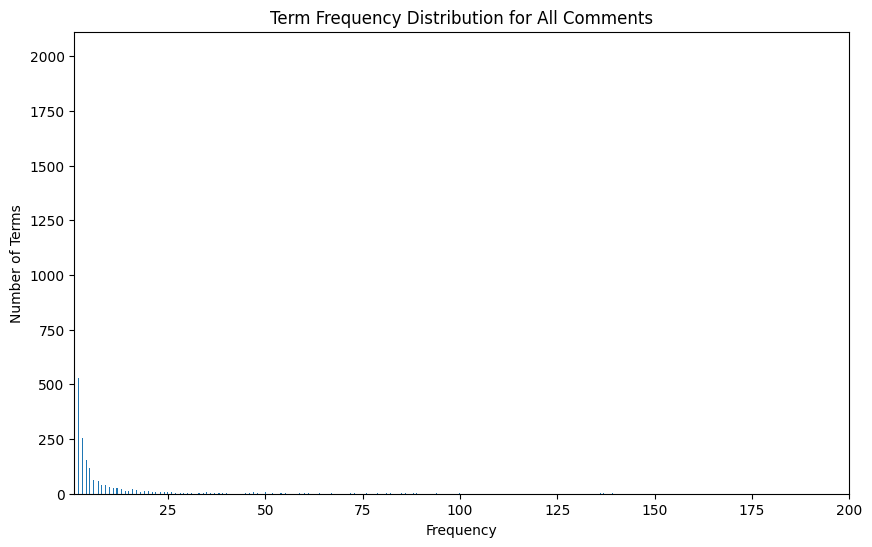

In [35]:
# Sum over all documents(comments) to get total frequency for each word
word_counts = term_doc_df.sum(axis=0).to_numpy()
word_counts

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000)
plt.title(f'Term Frequency Distribution for All Comments')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [36]:
# Generate filter of top 5% frequent words

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  
sorted_counts = np.sort(word_counts)[::-1] 

# Calculate the number of the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Generate the filter of the top 5% most frequent terms
top5_filter_words = [term_doc_df.iloc[:, i].name for i in top_5_percent_indices]

print(f'Sorted counts: {sorted_counts}')
print(f'Sorted indices: {sorted_indices}')

print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {top5_filter_words}")


Sorted counts: [1351  997  937 ...    1    1    1]
Sorted indices: [3284 3300 3336 ... 2032 3729    2]
Number of terms in top 5%: 186
Filtered terms: ['the', 'this', 'to', 'and', 'my', 'song', 'of', 'in', 'it', 'was', 'me', 'is', 'you', 'that', 'so', 'love', 'when', 'back', 'for', 'music', 'memories', 'on', 'with', 'time', 'great', 'but', 'have', 'years', 'all', 'he', 'beautiful', 'as', 'like', 'one', 'songs', 'old', 'just', 'her', 'we', 'she', 'at', 'from', 'be', 'good', 'not', 'now', 'voice', 'can', 'what', 'remember', 'always', 'his', 'still', 'they', 'much', 'brings', 'will', 'are', 'never', 'days', 'had', 'many', 'very', 'am', 'up', 'best', 'listening', 'him', 'thank', 'these', 'first', 'really', 'who', 'miss', 'out', 'listen', 'how', 'hear', 'about', 'childhood', 'were', 'no', 'heard', 'ever', 'would', 'reminds', 'those', 'there', 'loved', 'by', 'only', 'sing', 'know', 'an', 'more', 'has', 'every', 'if', 'dad', 'life', 'could', 'young', 'then', 'some', 'today', 'used', 'such', 's

In [37]:
# Generate the filter of bottom 1% frequent words

bottom_1_percent_index = int(0.01 * total_terms)
bottom_1_percent_indices = sorted_indices[-bottom_1_percent_index:]
bottom1_filter_words = [term_doc_df.iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {bottom1_filter_words}")
word_counts

Number of terms in bottom 1%: 37
Filtered terms: ['woke', 'wold', 'wolfman', 'won', 'wonderfull', '10m', '17th', '1927', '1930', '1930s', '1950', '1955', '1956', '1957', 'yahooo', 'yarbirds', 'yearn', 'yeas', 'yo', 'yokel', 'worthwhile', 'lunch', 'lust', 'luton', 'luxembourg', 'log', 'lola', 'longed', 'loops', 'loosing', 'loping', 'lorry', 'losing', 'lover', 'lovers', 'zulus', '045']


array([1, 2, 1, ..., 1, 1, 1])

In [38]:
# Filter out the top 5% and bottom 1% frequent words
term_doc_df_filtered = term_doc_df.drop(columns=top5_filter_words + bottom1_filter_words)
term_doc_df_filtered

00  000  07  10  100  11  11th  12  13  14  ...  youngsters  yours  \
0      0    0   0   0    0   0     0   0   0   0  ...           0      0   
1      0    0   0   0    0   0     0   0   0   0  ...           0      0   
2      0    0   0   0    0   0     0   0   0   0  ...           0      0   
3      0    0   0   0    0   0     0   0   0   0  ...           0      0   
4      0    0   0   0    0   0     0   0   0   0  ...           0      0   
...   ..  ...  ..  ..  ...  ..   ...  ..  ..  ..  ...         ...    ...   
1494   0    0   0   0    0   0     0   0   0   0  ...           0      0   
1495   0    0   0   0    0   0     0   0   0   0  ...           0      0   
1496   0    0   0   0    0   0     0   0   0   0  ...           0      0   
1497   0    0   0   0    0   0     0   0   0   0  ...           0      0   
1498   0    0   0   0    0   0     0   0   0   0  ...           0      0   

      yourself  youth  youthful  youtube  yrs  yuo  yup  zealand  
0            0      0         0        0    0    0    0        0  
1            0      0         0        0    0    0    0        0  
2            0      0         0        0    0    0    0        0  
3            0      0         0        0    0    0    0        0  
4            0      0         0        0    0    0    0        0  
...        ...    ...       ...      ...  ...  ...  ...      ...  
1494         0      0         0        0    0    0    0        0  
1495         0      0         0        0    0    0    0        0  
1496         0      0         0        0    0    0    0        0  
1497         0      0         0        0    0    0    0        0  
1498         0      0         0        0    0    0    0        0  

[1499 rows x 3507 columns]

In [39]:
# Generate csv file for PAMI Library
from PAMI.extras.DF2DB import DenseFormatDF as db

obj = db.DenseFormatDF(term_doc_df_filtered)
# Use >= 1 to filter out the words that appear in at least 1 comment since there are many 0s in the matrix
obj.convert2TransactionalDatabase(f'td_freq_db_comments.csv', '>=', 1)

Database size (total no of transactions) : 1465
Number of items : 3507
Minimum Transaction Size : 1
Average Transaction Size : 7.267576791808874
Maximum Transaction Size : 42
Standard Deviation Transaction Size : 5.8110821451798405
Variance in Transaction Sizes : 33.79174173334079
Sparsity : 0.9979276940998549


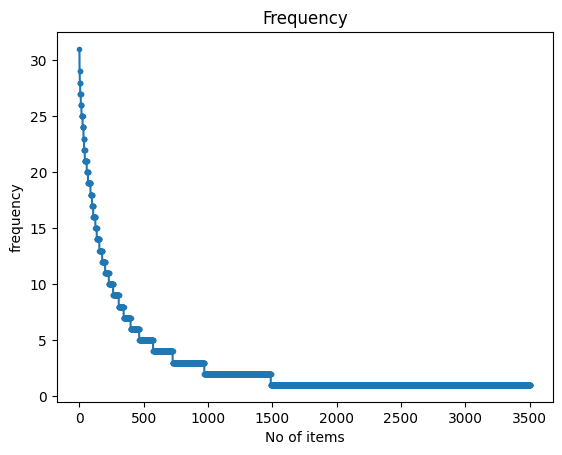

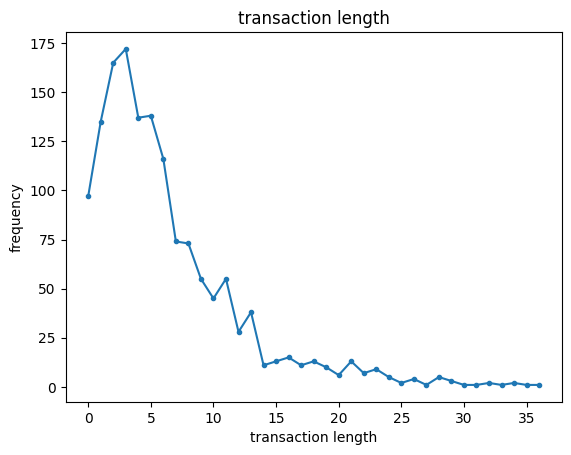

In [40]:
# Oberserve the transactional database

from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase(f'td_freq_db_comments.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


In [45]:
# Use FPGrowth to find frequent patterns
from PAMI.frequentPattern.basic import FPGrowth as alg

# By observation of the frequency distribution, choose min_support = 9
min_support = 9
obj2 = alg.FPGrowth(f'td_freq_db_comments.csv', minSup=min_support)
obj2.mine()
frequentPatternsDF= obj2.getPatternsAsDataFrame()

# Sort the patterns by support
frequentPatternsDF.sort_values(by='Support', ascending=False)
frequentPatternsDF

print('Total No of patterns: ' + str(len(frequentPatternsDF)))
print('Runtime: ' + str(obj2.getRuntime()))

# Save the patterns
obj2.save('freq_patterns_comments.txt')
frequentPatternsDF


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 308
Runtime: 0.018832683563232422


Patterns  Support
0        comes        9
1        tunes        9
2        close        9
3         king        9
4           18        9
..         ...      ...
303     before       28
304    playing       28
305  fantastic       29
306       even       29
307       live       31

[308 rows x 2 columns]

In [55]:
# Convert the patterns into binary data within the columns of our document-term matrix

# Tokenize the comments
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=frequentPatternsDF['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized comment
for pattern in frequentPatternsDF['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)
    
# Generate dataframe of the pattern matrix
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['comment'])
terms = count_vect.get_feature_names_out()
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate tdm_df and pattern_matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  sweet  child  60  \
0      0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1      0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
2      0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
3      0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
4      0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...  ..   
1495   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   

      lot  kid  before  playing  fantastic  even  live  
0       0    0       0        0          0     0     0  
1       0    1       0        0          0     0     0  
2       0    0       0        0          0     0     0  
3       0    0       0        0          0     0     0  
4       0    0       0        0          0     0     0  
...   ...  ...     ...      ...        ...   ...   ...  
1495    0    0       0        0          0     0     0  
1496    0    0       0        0          0     0     0  
1497    0    0       0        0          0     0     0  
1498    0    0       0        0          0     1     0  
1499    0    0       0        0          0     0     0  

[1499 rows x 4038 columns]

In [60]:
# Implement FAE Top-K and MaxFPGrowth mining part
from PAMI.frequentPattern.topk import FAE as fae
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp

# Implement FAE Top-K
for k in [50, 100, 150]:
    obj3 = fae.FAE(f'td_freq_db_comments.csv', k=k)
    obj3.mine()
    fae_patterns = obj3.getPatternsAsDataFrame()
    print(f'Total No of patterns: {len(fae_patterns)}')
    print(f'Runtime: {obj3.getRuntime()}')
    obj3.save(f'fae_patterns_k{k}.txt')

# Implement MaxFPGrowth
for minSup in [3, 6, 9]:
    obj4 = maxfp.MaxFPGrowth(f'td_freq_db_comments.csv', minSup=minSup)
    obj4.mine()
    maxfp_patterns = obj4.getPatternsAsDataFrame()
    print(f'Total No of patterns: {len(maxfp_patterns)}')
    print(f'Runtime: {obj4.getRuntime()}')
    obj4.save(f'maxfp_patterns_minSup{minSup}.txt')

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 50
Runtime: 0.008964300155639648
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.07873940467834473
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 150
Runtime: 0.007433176040649414
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 941
Runtime: 0.018987655639648438
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 457
Runtime: 0.010873079299926758
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 304
Runtime: 0.008572578430175781


### Dimensionality Reduction

PCA: (1499, 2)
t-SNE: (1499, 2)
UMAP: (1499, 2)


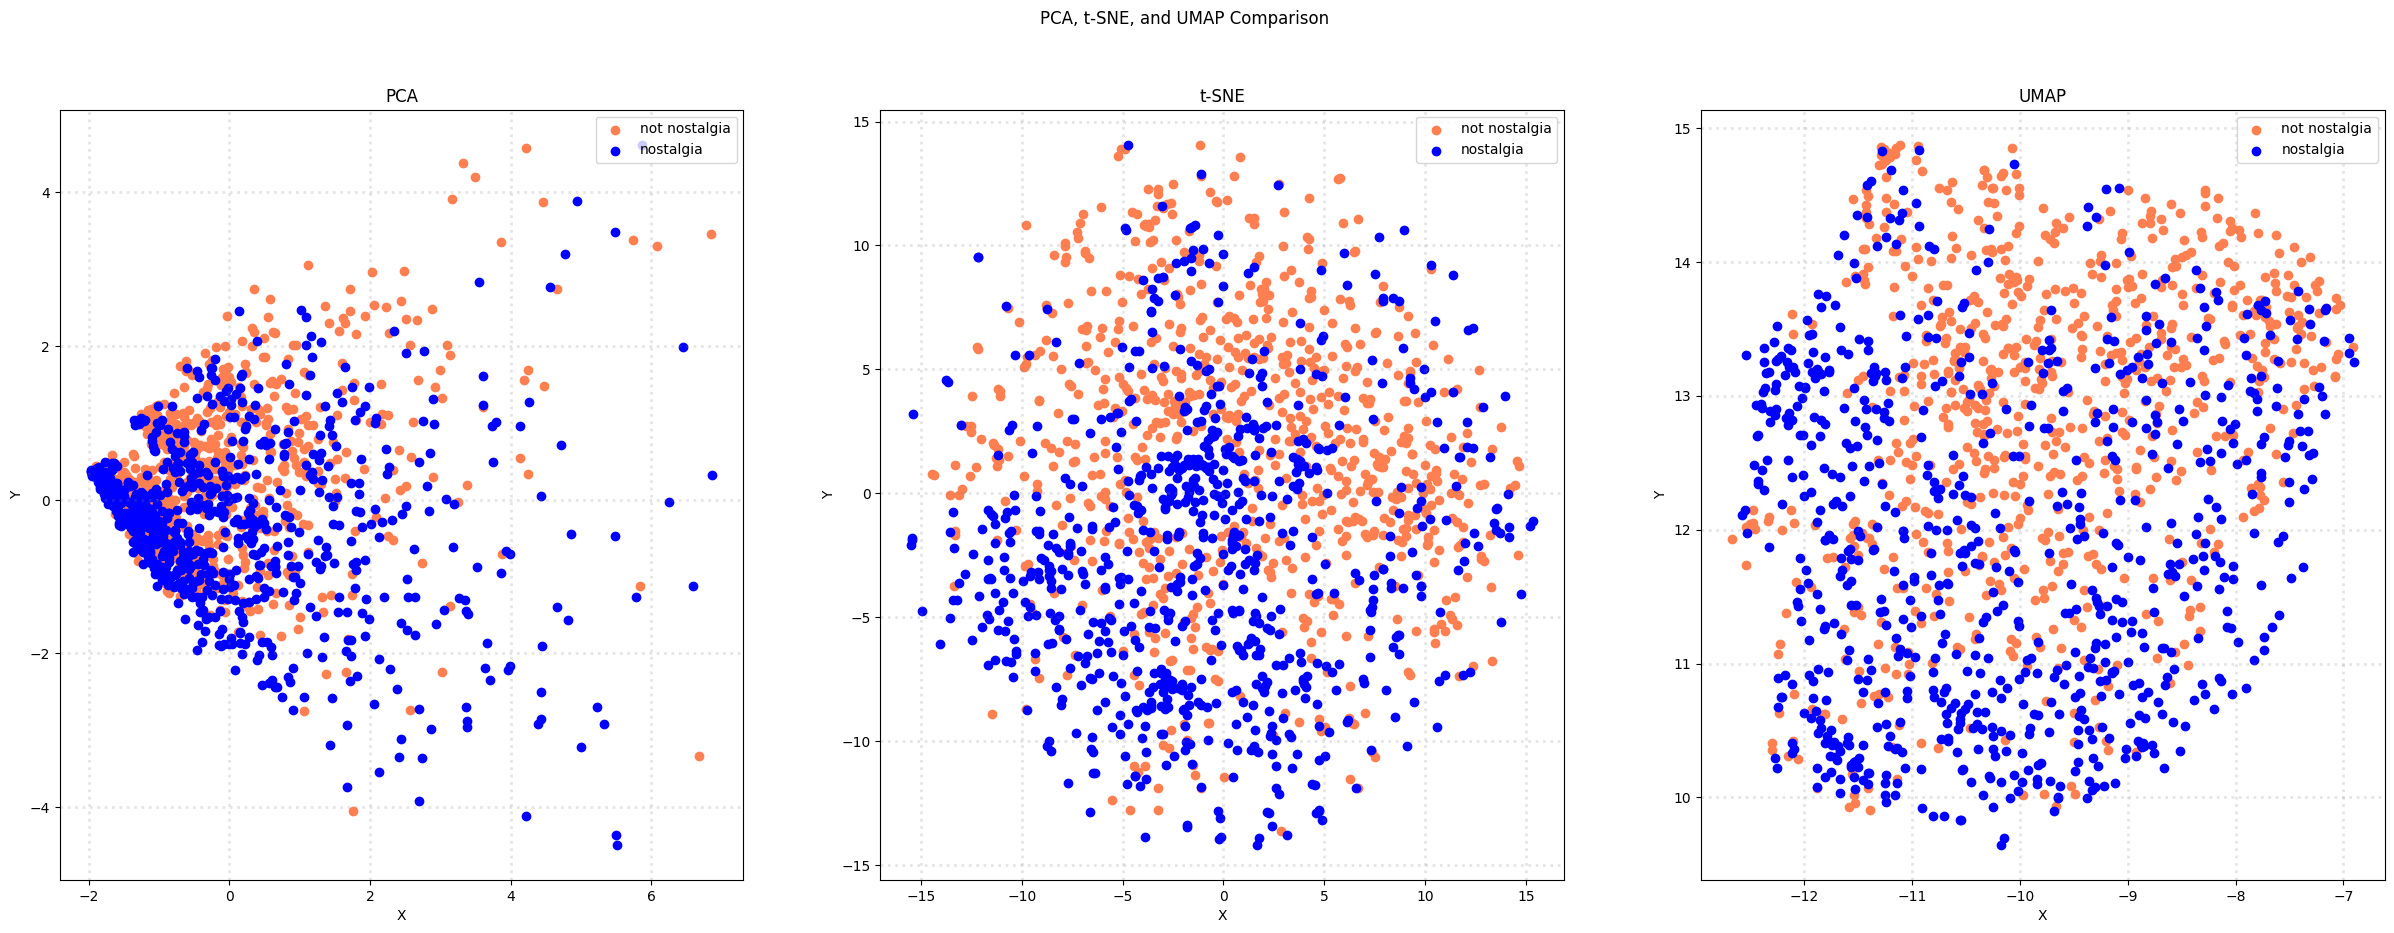

In [65]:
# Apply dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# print the shape of the reduced data
print(f'PCA: {X_pca_tdm.shape}')
print(f't-SNE: {X_tsne_tdm.shape}')
print(f'UMAP: {X_umap_tdm.shape}')

# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots 
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

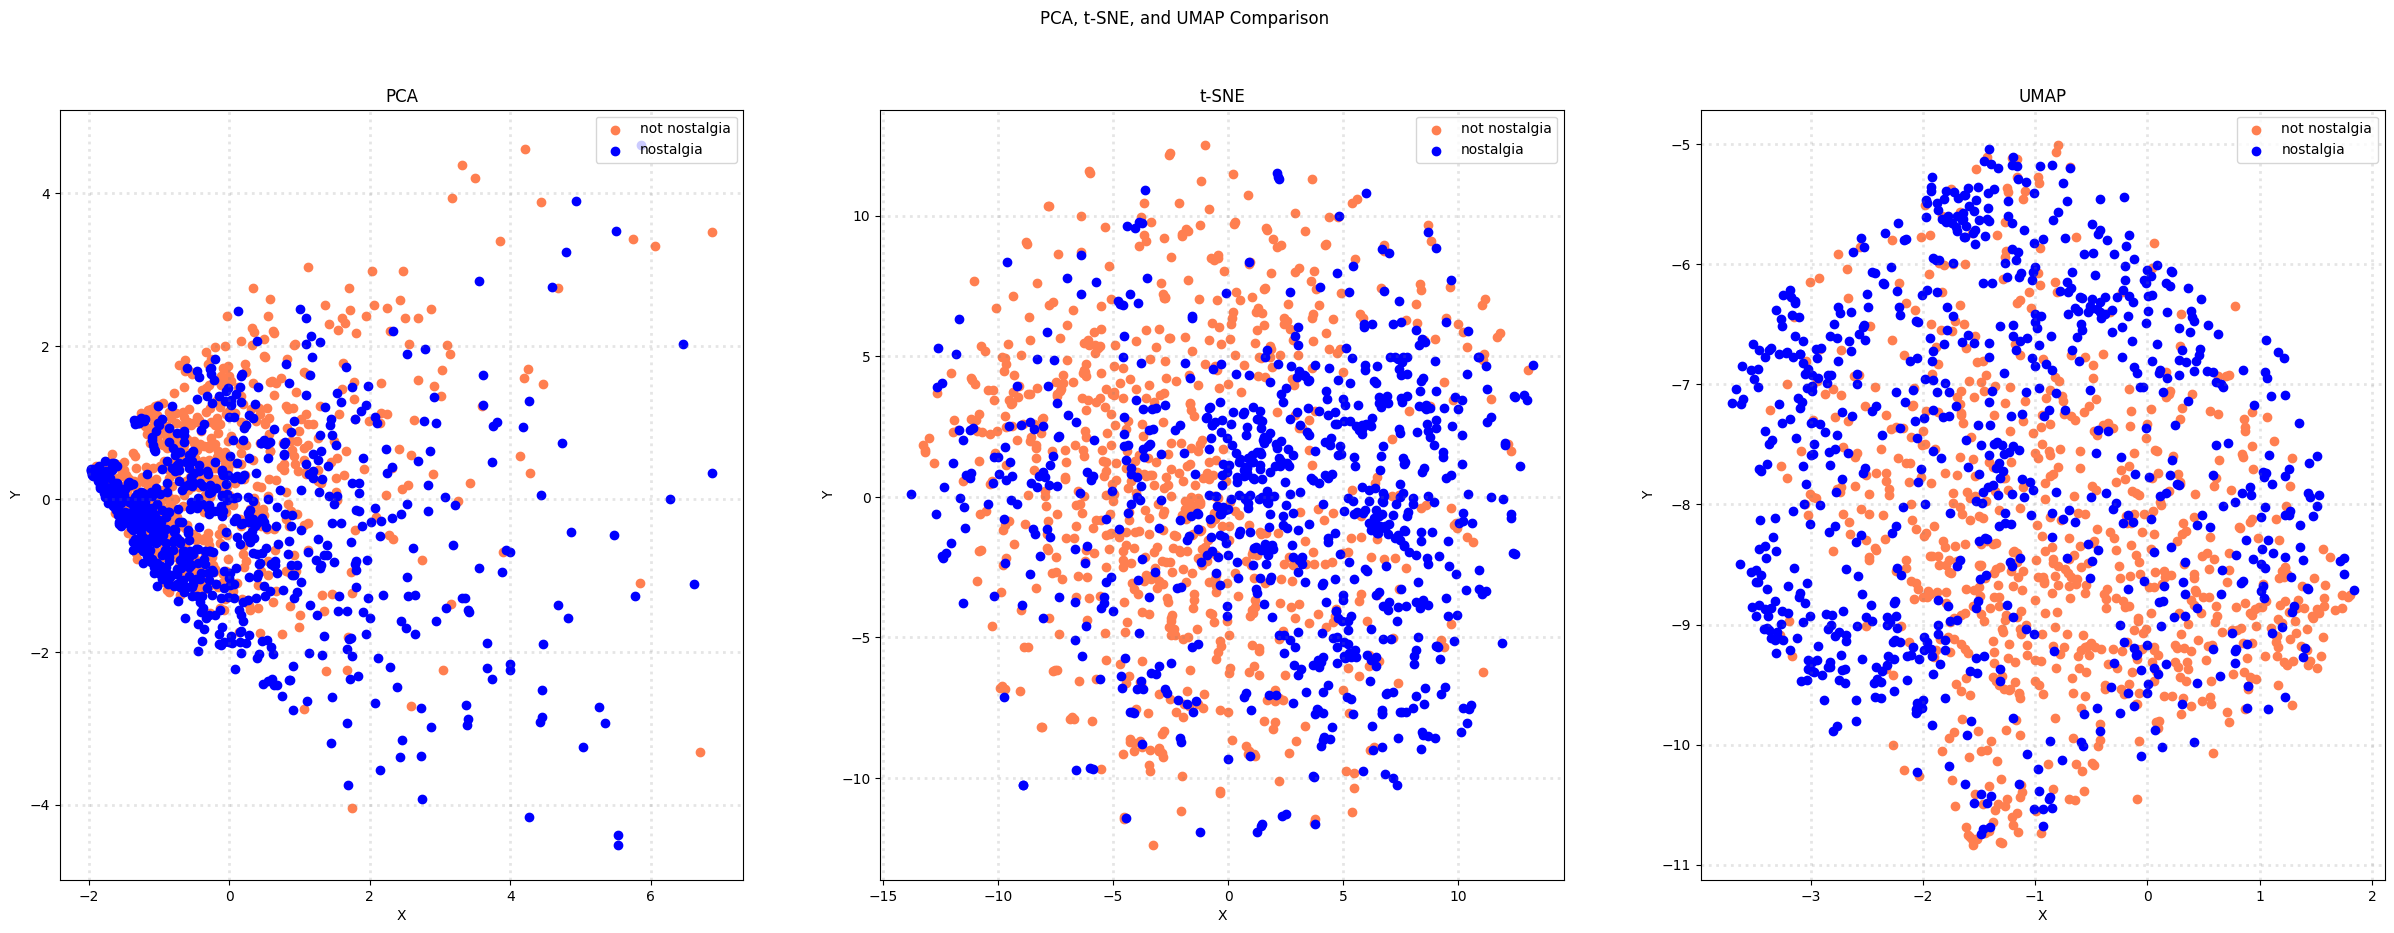

In [66]:
# Apply dimensionality reduction with augmented data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

/home/shen/.local/share/virtualenvs/2024NTHU_DATAMINING-mXtGUlb_/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



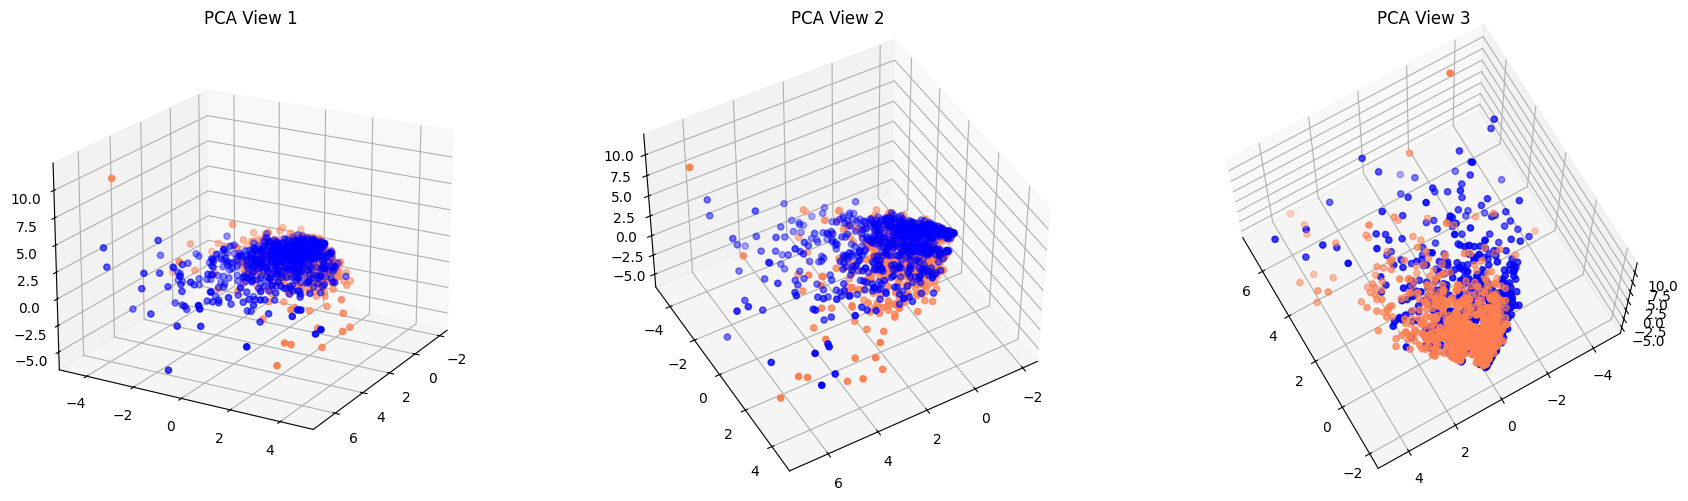

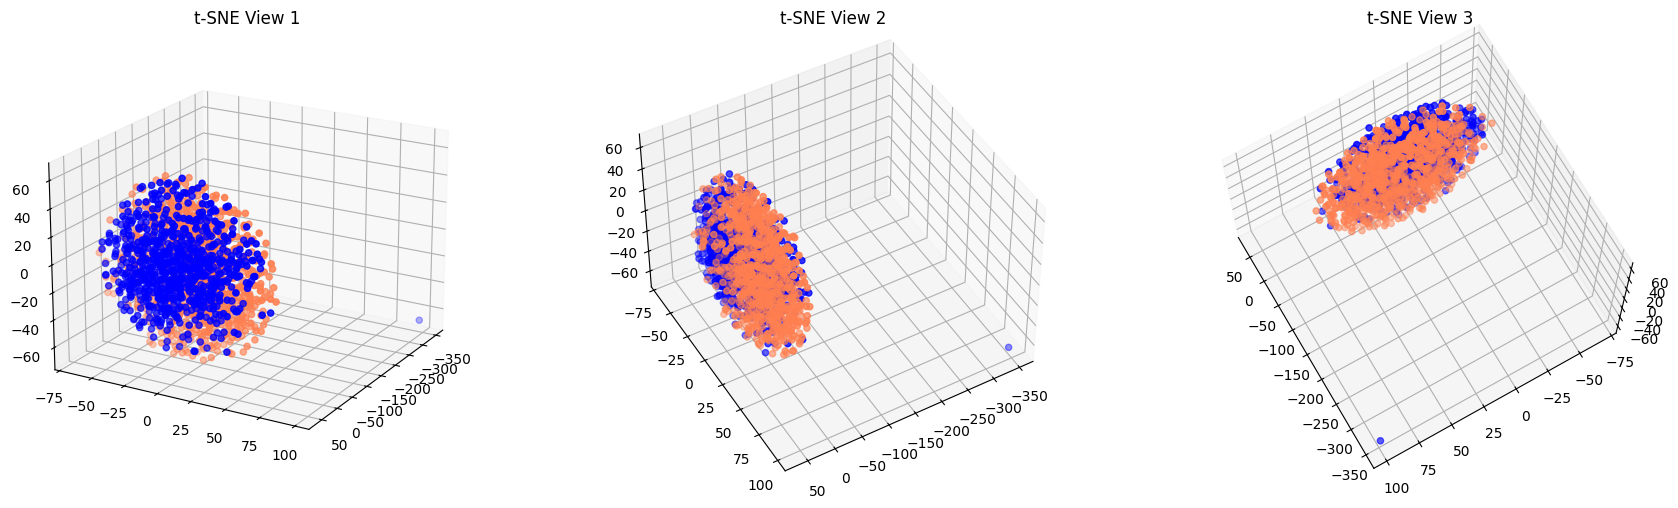

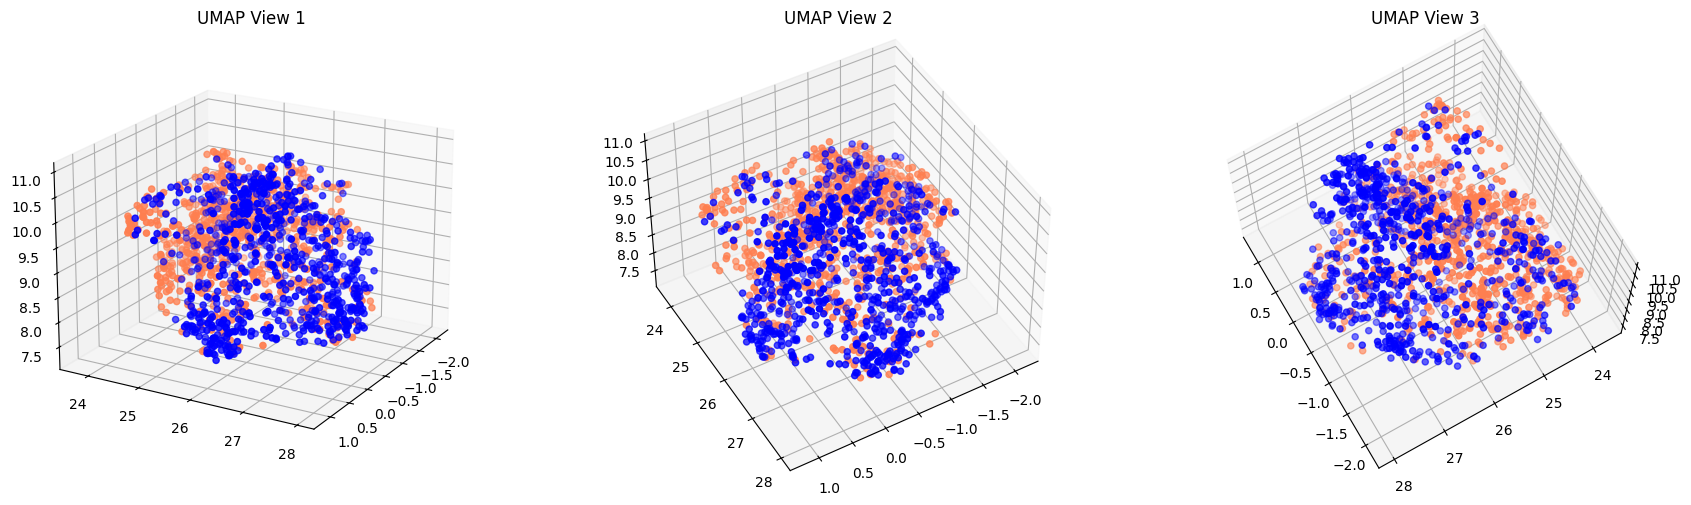

In [67]:
# 3D visualization of three methods

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

col = ['coral', 'blue']
categories = df['sentiment'].unique() 

# Reduce dimensions to 3
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3, random_state=42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

# Define viewing angles
angles = [(20, 30), (45, 60), (70, 150)]  # (elev, azim) pairs

def plot_scatter(ax, X_reduced, title):
    fig = plt.figure(figsize=(18, 5))
    for i, angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        for c, category in zip(col, categories):
            xs = X_reduced[df['sentiment'] == category].T[0]
            ys = X_reduced[df['sentiment'] == category].T[1]
            zs = X_reduced[df['sentiment'] == category].T[2]
            ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
            ax.view_init(elev=angle[0], azim=angle[1])
            ax.set_title(f'{title} View {i+1}')
    plt.tight_layout()
    plt.show()
        
 

# Plot PCA results
plot_scatter(axes[0], X_pca_aug, 'PCA')

plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

### Discretization and Binarization

In [68]:
# Use label binarizer to convert the sentiment into binary values

from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()

mlb.fit(df['sentiment'])

df['sentiment_binary'] = mlb.transform(df['sentiment'])

df

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

                                               unigrams  \
0     [He, was, a, singer, with, a, golden, voice, t...   
1     [The, mist, beautiful, voice, ever, I, listene...   
2     [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3     [30, day, leave, from, 1st, tour, in, Viet, Na...   
4     [listening, to, his, songs, reminds, me, of, m...   
...                                                 ...   
1495  [i, do, n't, know, !, .., but, the, opening, o...   
1496  [it, 's, sad, this, is, such, a, beautiful, so...   
1497  [Dear, Friend, ,, I, think, age, and, time, is...   
1498  [I, was, born, in, 1954, and, started, to, be,...   
1499  [This, is, the, first, CD, I, bought, after, m...   

                                      tokenized_comment  sentiment_binary  
0     {with, 16years, many, I, those, now,, we, but,...                 1  
1     {I, beautiful, of, mist, a, singing, was, his,...                 0  
2     {with, little, pretensions, grow, who, I, it, ...                 0  
3     {hope, some, 47, later, song, who, I, 2nd, rec...                 1  
4     {listening, his, who, played, everyday, to, so...                 0  
...                                                 ...               ...  
1495  {who, video,..seeing, well!...or, of, i, got, ...                 1  
1496  {song, beautiful, sad, really, such, a, your, ...                 1  
1497  {I, it, comes, song., not, time, age, think, D...                 1  
1498  {aware, Elvis, many, who, I, born, started, pr...                 0  
1499  {first, song, later, I, marriage, 28, bought, ...                 0  

[1499 rows x 5 columns]

### Data Exploration

In [69]:
# Retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [70]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2[0][0]})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3[0][0]})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3[0][0]})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1[0][0]})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2[0][0]})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3[0][0]})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Data Classification

In [75]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [84]:
# Use the original document-term matrix and naive bayes to classify the sentiment

# Create a mapping from numerical labels to category names
category_mapping = {label: category for label, category in enumerate(df['sentiment'].unique())}

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

In [85]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  sweet  child  60  \
486    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
528    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
200    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
890    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
845    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...  ..   
1131   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
861    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   

      lot  kid  before  playing  fantastic  even  live  
486     0    0       0        0          0     0     0  
528     0    0       0        0          0     0     0  
200     0    0       0        1          0     0     0  
890     0    0       0        1          0     0     0  
845     0    0       0        0          0     0     0  
...   ...  ...     ...      ...        ...   ...   ...  
1131    0    0       0        0          0     0     0  
1295    0    0       0        0          0     0     0  
861     0    0       0        0          0     0     0  
1460    0    0       0        0          0     0     0  
1127    0    0       0        0          0     0     0  

[1049 rows x 4038 columns]

In [86]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  sweet  child  60  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
423    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
414    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
452    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...  ..   
1084   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
991    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
651    0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0      0   0   

      lot  kid  before  playing  fantastic  even  live  
1117    0    0       0        0          0     0     0  
1396    0    0       0        0          0     0     0  
423     0    0       0        0          0     0     0  
414     0    0       0        0          0     0     0  
452     0    0       0        0          0     0     0  
...   ...  ...     ...      ...        ...   ...   ...  
1084    0    0       0        0          0     0     0  
991     0    0       0        0          0     0     0  
651     0    0       0        0          0     0     0  
1188    0    0       0        0          0     0     0  
1459    0    0       0        0          0     0     0  

[450 rows x 4038 columns]

In [87]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8178    0.9442    0.8765       233
    nostalgia     0.9282    0.7742    0.8442       217

     accuracy                         0.8622       450
    macro avg     0.8730    0.8592    0.8604       450
 weighted avg     0.8710    0.8622    0.8609       450



## 3. Attempt the three tasks on the new dataset